In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
np.__version__

'1.24.3'

In [3]:
data=pd.read_csv('training.1600000.processed.noemoticon.csv',error_bad_lines=False,encoding='latin',names=['sentiment','tweet_num','timestamp','flag','twitter_id','tweet'])
data.head()

C:\Users\sumuk\AppData\Local\Temp\ipykernel_8560\2219542379.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('training.1600000.processed.noemoticon.csv',error_bad_lines=False,encoding='latin',names=['sentiment','tweet_num','timestamp','flag','twitter_id','tweet'])


,sentiment,tweet_num,timestamp,flag,twitter_id,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
col_name=list(data.columns)
col_name

['sentiment', 'tweet_num', 'timestamp', 'flag', 'twitter_id', 'tweet']

In [5]:
data.shape

(1600000, 6)

In [6]:
data['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [7]:
data['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [8]:
data['sentiment']=data['sentiment'].map({0:0,4:1})

In [9]:
data['sentiment'].unique()

array([0, 1], dtype=int64)

50% of data is positive and 50% of data is negetive 

0 -->Negetive
1 -->Positive

In [10]:
data.drop(['tweet_num','timestamp','flag','twitter_id'],inplace=True,axis=1)

In [11]:
data.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


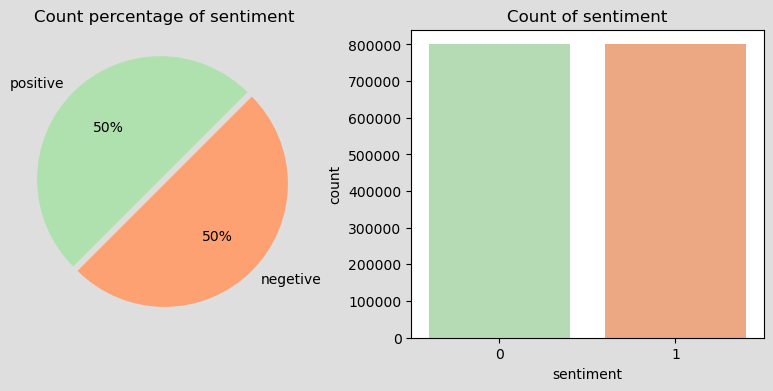

In [12]:
plt.figure(figsize=(10,4),facecolor='#dedede')
plt.subplot(1,2,1)
plt.title('Count percentage of sentiment')
plt.pie(data['sentiment'].value_counts(),explode=[0.05,0],autopct='%0.0f%%',colors=['#AFE1AF','#fda172'],labels=['positive','negetive'],startangle=45)
plt.subplot(1,2,2)
plt.title('Count of sentiment')
ax=sns.countplot(data,x='sentiment',palette=['#AFE1AF','#fda172'])

In [13]:
import nltk
nltk.download('omw-1.4')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
USER_PATTERN='@[^\s]+'
HASHTAG_PATTERN='#[^\s]+'
URL_PATTERN='https?[^ ]*'
stop_words=set(stopwords.words('english'))
def preprocess(tweet):
    tweet=tweet.lower()
    tweet=re.sub(USER_PATTERN,'',tweet)
    tweet=re.sub(HASHTAG_PATTERN,'',tweet)
    tweet=re.sub(URL_PATTERN,'',tweet)
    tweet=re.sub('[^A-Za-z0-9]',' ',tweet)
    tweet=[lemmatizer.lemmatize(word) for word in tweet.split() if not word in stop_words]
    tweet=" ".join(tweet)
    return tweet

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sumuk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
data['processed_tweet']=data['tweet'].apply(preprocess)

In [15]:
data.head()

,sentiment,tweet,processed_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save 50 rest go b...
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad see


In [16]:
for i in range(20):
    print(data['tweet'][i])
    print(data['processed_tweet'][i])
    print()

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
awww bummer shoulda got david carr third day

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
upset update facebook texting might cry result school today also blah

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
dived many time ball managed save 50 rest go bound

my whole body feels itchy and like its on fire 
whole body feel itchy like fire

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
behaving mad see

@Kwesidei not the whole crew 
whole crew

Need a hug 
need hug

@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
hey long time see yes rain bit bit lol fine thanks

@Tatiana_K nope they didn't have it 
nope

@twittera que me muera ? 
que muera

spring

In [17]:
data=data.drop('tweet',axis=1)

In [18]:
data.head()

,sentiment,processed_tweet
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many time ball managed save 50 rest go b...
3,0,whole body feel itchy like fire
4,0,behaving mad see


In [19]:
positive_tweets=data['processed_tweet'][data['sentiment']==1]
negetive_tweets=data['processed_tweet'][data['sentiment']==0]

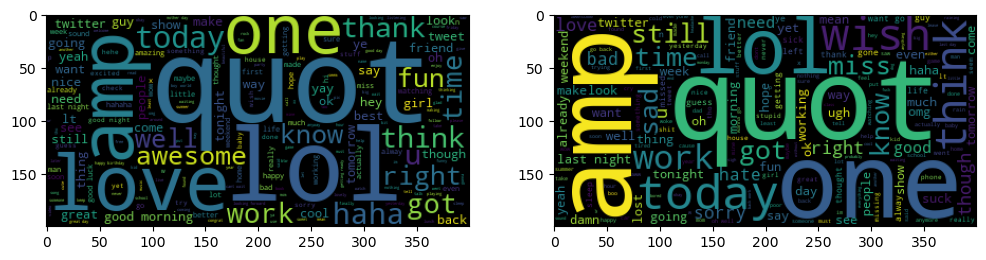

In [20]:
from wordcloud import WordCloud
plt.figure(figsize=(12,10))
wc=WordCloud().generate(" ".join(positive_tweets))
plt.subplot(1,2,1)
plt.imshow(wc)
wc=WordCloud().generate(" ".join(negetive_tweets))
plt.subplot(1,2,2)
plt.imshow(wc)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data['processed_tweet'],data['sentiment'],test_size=0.1,random_state=43)

In [22]:
documents=[sentence.split() for sentence in X_train]

In [23]:
from gensim.models.word2vec import Word2Vec
w2_vec_model=Word2Vec(vector_size=100, window=5, min_count=3, workers=4)

In [24]:
w2_vec_model.build_vocab(documents,progress_per=1000)

In [25]:
w2_vec_model.train(documents,total_words=len(documents),epochs=25)

(234161905, 256395650)

In [26]:
w2_vec_model.wv.most_similar('country')

[('continent', 0.6475254893302917),
 ('state', 0.6157523989677429),
 ('canadian', 0.5782963633537292),
 ('basque', 0.5749532580375671),
 ('america', 0.5657575726509094),
 ('region', 0.5556458234786987),
 ('northern', 0.5460875630378723),
 ('israel', 0.5418887734413147),
 ('african', 0.5383856296539307),
 ('europe', 0.5343031287193298)]

In [27]:
w2_vec_model.wv.most_similar('health')

[('medical', 0.7146565914154053),
 ('policy', 0.6050646901130676),
 ('financial', 0.6027770638465881),
 ('healthcare', 0.5972709655761719),
 ('hygiene', 0.5881935954093933),
 ('government', 0.5746036171913147),
 ('safety', 0.5653246641159058),
 ('dentistry', 0.5581243634223938),
 ('economic', 0.5561579465866089),
 ('holistic', 0.5459724068641663)]

In [28]:
w2_vec_model.wv.most_similar('stock')

[('discontinued', 0.6729077100753784),
 ('purchase', 0.6368427276611328),
 ('purchased', 0.6104748249053955),
 ('shipping', 0.6097750067710876),
 ('carbon', 0.6073111891746521),
 ('sell', 0.6069440245628357),
 ('currency', 0.5981146097183228),
 ('item', 0.5921216607093811),
 ('cheapest', 0.5886653661727905),
 ('selling', 0.5871226191520691)]

In [29]:
w2_vec_model.wv.most_similar('food')

[('meat', 0.637767493724823),
 ('meal', 0.6172161102294922),
 ('pizza', 0.6125167012214661),
 ('durian', 0.6089931130409241),
 ('paella', 0.603013813495636),
 ('lasagna', 0.6014055013656616),
 ('dinner', 0.5852773785591125),
 ('cuisine', 0.5834960341453552),
 ('takeaway', 0.583480715751648),
 ('supper', 0.5810531377792358)]

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [31]:
X_train=pad_sequences(tokenizer.texts_to_sequences(X_train),maxlen=50,padding='pre')
X_test=pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=50,padding='pre')

In [32]:
vocabulary_size=len(tokenizer.word_index)+1
vocabulary_size

247059

In [33]:
embedding_matrix=np.zeros((vocabulary_size,100))
for word,i in tokenizer.word_index.items():
    if word in w2_vec_model.wv:
        embedding_matrix[i]=w2_vec_model.wv[word]
        

In [34]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.53524816,  0.60115099,  0.58392566, ...,  1.16337037,
        -2.48903203,  1.25518823],
       [-1.78962123, -0.96877879, -0.58203709, ..., -1.81551826,
        -1.39179754,  0.9108001 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout
from tensorflow.keras.models import Sequential
embedding_layer = Embedding(vocabulary_size, 100, weights=[embedding_matrix], trainable=False)

In [36]:
model=Sequential([
    embedding_layer,
    Dropout(0.4),
    LSTM(units=100,dropout=0.2,recurrent_dropout=0.2),
    Dense(units=16,activation='relu'),
    Dense(units=1,activation='sigmoid')
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         24705900  
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 24787933 (94.56 MB)
Trainable params: 82033 (320.44 KB)
Non-trainable params: 24705900 (94.25 MB)
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [144]:
history=model.fit(x=X_train,y=Y_train,batch_size=1024,epochs=15,callbacks=callbacks,validation_split=0.2)

Epoch 1/15
1125/1125 [==============================] - 1754s 2s/step - loss: 0.5143 - accuracy: 0.7421 - val_loss: 0.4715 - val_accuracy: 0.7745 - lr: 0.0010
Epoch 2/15
1125/1125 [==============================] - 1970s 2s/step - loss: 0.4902 - accuracy: 0.7592 - val_loss: 0.4623 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 3/15
1125/1125 [==============================] - 1836s 2s/step - loss: 0.4835 - accuracy: 0.7637 - val_loss: 0.4603 - val_accuracy: 0.7813 - lr: 0.0010
Epoch 4/15
1125/1125 [==============================] - 1850s 2s/step - loss: 0.4798 - accuracy: 0.7661 - val_loss: 0.4577 - val_accuracy: 0.7834 - lr: 0.0010
Epoch 5/15
1125/1125 [==============================] - 1824s 2s/step - loss: 0.4767 - accuracy: 0.7683 - val_loss: 0.4545 - val_accuracy: 0.7843 - lr: 0.0010
Epoch 6/15
1125/1125 [==============================] - 1569s 1s/step - loss: 0.4755 - accuracy: 0.7694 - val_loss: 0.4533 - val_accuracy: 0.7849 - lr: 0.0010
Epoch 7/15
1125/1125 [========================

In [145]:
history.history

{'loss': [0.5143221616744995,
  0.49016135931015015,
  0.4835399389266968,
  0.4797981083393097,
  0.4767231345176697,
  0.475488543510437,
  0.47453391551971436,
  0.4727799892425537,
  0.47167524695396423,
  0.47092241048812866,
  0.4703952968120575,
  0.46985334157943726,
  0.46918147802352905,
  0.46846306324005127,
  0.4680355489253998],
 'accuracy': [0.7420807480812073,
  0.759202241897583,
  0.7637291550636292,
  0.7660850882530212,
  0.7683446407318115,
  0.7693871259689331,
  0.7695538401603699,
  0.7703593969345093,
  0.7716466784477234,
  0.7718454599380493,
  0.7723706364631653,
  0.7725086808204651,
  0.7729383707046509,
  0.7731449604034424,
  0.7737473845481873],
 'val_loss': [0.4714725613594055,
  0.46229541301727295,
  0.4602706730365753,
  0.45771539211273193,
  0.45452433824539185,
  0.45334914326667786,
  0.4537964165210724,
  0.4513775408267975,
  0.4532075822353363,
  0.45017099380493164,
  0.45030030608177185,
  0.4490983188152313,
  0.44912341237068176,
  0.4480

In [146]:
model.save("sentimentanalysis.h5")

C:\Users\sumuk\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [153]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']
loss=history.history['loss']
validation_loss=history.history['val_loss']
epochs=range(len(accuracy))

<Figure size 2000x1000 with 0 Axes>

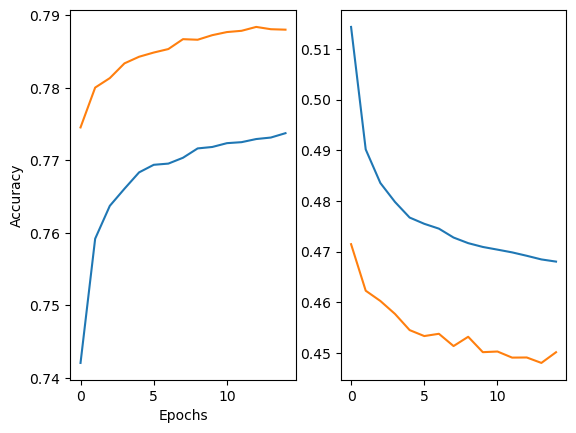

In [165]:
plt.figure(figsize=(20,10))
plt.subplots(1,2,)
plt.subplot(1,2,1)
plt.plot(epochs,accuracy,label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epochs,validation_accuracy,label="Validation Accuracy")
plt.subplot(1,2,2)
plt.plot(epochs,loss)
plt.plot(epochs,validation_loss)

In [39]:
def preprocess(text):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',text)
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    print(review)
    review=pad_sequences(tokenizer.texts_to_sequences([review]), maxlen=300)
    return review

In [40]:
from tensorflow.keras.models import load_model
loaded_model=load_model('sentimentanalysis.h5')

In [205]:
loaded_model.predict(preprocess('Ashoka was the greatest emperor'))

['ashoka', 'greatest', 'emperor']
1/1 [==============================] - 1s 721ms/step


array([[0.92987394]], dtype=float32)

In [207]:
loaded_model.predict(preprocess('Elon is launching spaceX'))

['elon', 'launching', 'spacex']
1/1 [==============================] - 0s 88ms/step


array([[0.8909659]], dtype=float32)

In [210]:
loaded_model.predict(preprocess('Terrorists are major conerns for the nation security'))

['terrorists', 'major', 'conerns', 'nation', 'security']
1/1 [==============================] - 0s 72ms/step


array([[0.41849706]], dtype=float32)

In [213]:
loaded_model.predict(preprocess('Rama went to Srilanka in search of Sita'))

['rama', 'went', 'srilanka', 'search', 'sita']
1/1 [==============================] - 0s 96ms/step


array([[0.6680435]], dtype=float32)

In [214]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [219]:
import pickle 
pickle.format_version

'4.0'